In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Globals
GRAVITY = 9.81
RHO = 1.225                 # kg/m^3 @ sea lvl (air density)
LIFT_SLOPE = 2*np.pi
ROTATIONAL_AOA = 6          # degrees
ROTATIONAL_V = 4.5              # m/s (ill approximate rotation speed for flow speed @ takeoff)

# heres the data in the xls file i was given:
weight = 8 * GRAVITY            # kg

wingspan = 2.0                  # m
wing_area = 0.7                 # m^2
wing_height_above_ground = 0.3  # m

aspect_ratio = wingspan**2 / wing_area
oswald_e = 0.7

fuselage_frontal_area = 0.02    # m^2
fuselage_drag_coefficient = 1.0

overall_drag_coefficient = 1.2
wheel_rolling_resistance = 0.012


# heres some functions for the necessary 
""" 
at the moment of takeoff i thought that the lift it would have to generate 
is exactly equal to the weight of the plane itself. also, the cL_takeoff's AoA
should be equal to zero
"""
def cL(AoA):
   cL_takeoff = 2 * weight / (RHO * ROTATIONAL_V**2 * wing_area) # AoA should be 0
   return (LIFT_SLOPE * AoA + cL_takeoff)


"""
ik the formula is T = v * (dm/dt), but at the instant of takeoff (dt) the mass isn't changing.
if mass isnt chaning then slope is zero?????????? ill just multiply by weight for now.
"""
def thrust_takeoff(takeoff_velocity):
   return takeoff_velocity * weight


"""
as i was thinking in terms of instantaneous moments at takeoff, i thought thrust should
be equal to drag at takeoff. ill try this for now
"""
def cD(AoA):
   cD_takeoff = 2 * thrust_takeoff(ROTATIONAL_V) / (RHO * ROTATIONAL_V**2 * wing_area) # AoA should also be 0
   k = 1 / (np.pi * oswald_e * aspect_ratio)
   return (cD_takeoff + cL(AoA)**2 * k)

Max Speed: 0.00 m/s


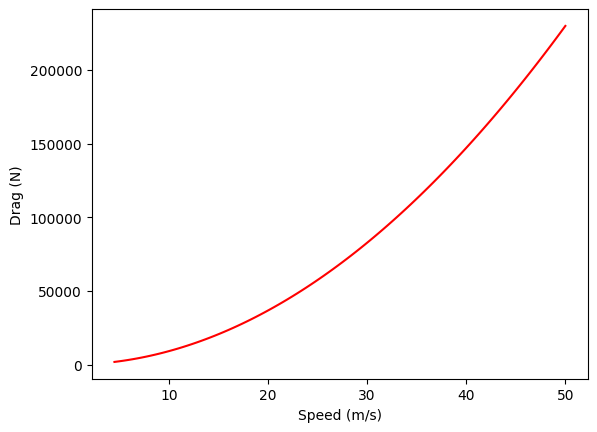

In [40]:
"""
okay so i think i got the variables and everything done... took a while cuz
i had some package problems and accidently switched to julia for some reason.
anyways heres some actual stuff:
"""

# max speed of an airplane is when drag = thrust, so:
""" 
creating a list of 50 speeds for the plane starting at takeoff rotational velocity
assuming: rotational velocity ---> 50m/s, 100 values

also created lists for calculated drags and thrusts as a function of velocity so
i can graph it after
"""
list_speeds = np.linspace(ROTATIONAL_V, 50, 100)
list_drags = np.linspace(0,0,100)
list_thrusts = np.linspace(0,0,100)




"""
iterating thru different speeds starting at takeoff velocity and finding drag
thrust. when drag = thrust then max speed! this is all for takeoff so ill use
the set takeoff
"""
# thrust = np.array([thrust_takeoff(ROTATIONAL_V) for ROTATIONAL_V in speed])
def drag(speed):
    return cD(ROTATIONAL_AOA) * 1/2 * RHO * speed**2 * wing_area

# ig this is all instantaneous so instead of mass change per sec, ill use weight * change in seconds
def thrust(speed):
    return speed * weight

    ### THIS IS DEFINTLY WRONG




"""
calculating drag + thrust. iterating thru list of speeds to base calcs on 
"""
for i in range(len(list_speeds)):
    list_drags[i] = drag(list_speeds[i])
    list_thrusts[i] = thrust(list_speeds[i])


"""
graphing drag + thrust
"""
x = list_speeds
y1 = list_drags

drag_thrust = plt.plot(x,y1,'r')

plt.xlabel("Speed (m/s)")
plt.ylabel("Drag (N)")

"""
max speed when thrust = drag
"""
max_speed = 0 #?????????
print(f"Max Speed: {max_speed:.2f} m/s")